In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('BlackFriday.csv').sample(100000, random_state=44)

In [3]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
377701,1004089,P00293142,M,26-35,7,A,1,0,5,NaN,NaN,1769
441314,1001895,P00112542,M,36-45,14,C,2,0,1,11.0,15.0,15525
343557,1004871,P00322142,M,18-25,12,C,2,0,1,14.0,NaN,19038
344184,1004973,P00115642,F,55+,2,C,1,1,8,14.0,NaN,8049
518804,1001880,P00053342,M,36-45,0,B,3,1,1,2.0,4.0,4447


In [4]:
dataset.shape

(100000, 12)

In [5]:
dataset['Gender'].unique()

array(['M', 'F'], dtype=object)

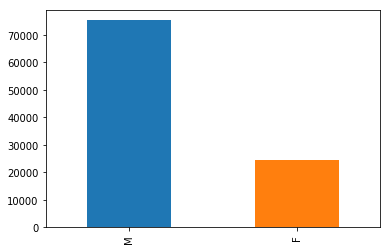

In [6]:
dataset['Gender'].value_counts().plot.bar()

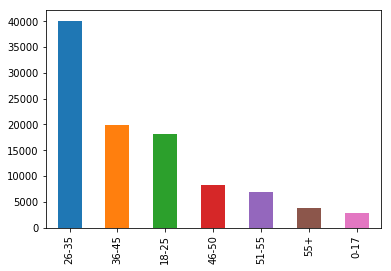

In [7]:
dataset['Age'].value_counts().sort_values(ascending=False).plot.bar()

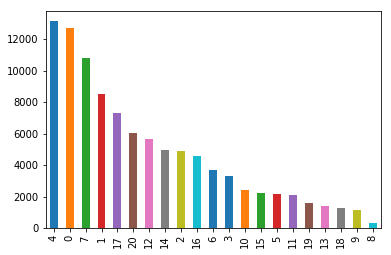

In [8]:
dataset['Occupation'].value_counts().plot.bar()

In [9]:
total_occ=len(dataset)
occ_df = pd.Series(dataset['Occupation'].value_counts() / total_occ).reset_index()
occ_df.columns = ['Occupation', 'Occupation_percent']
occ_df

,Occupation,Occupation_percent
0,4,0.13153
1,0,0.12678
2,7,0.10805
3,1,0.08520
4,17,0.07281
5,20,0.06059
6,12,0.05642
7,14,0.04944
8,2,0.04874
9,16,0.04551


In [10]:
dataset.groupby(['Occupation'])['Purchase'].mean().reset_index()

,Occupation,Purchase
0,0,9220.405032
1,1,8950.313732
2,2,9033.644235
3,3,9256.190840
4,4,9269.002889
5,5,9526.679001
6,6,9270.098370
7,7,9537.709486
8,8,9658.894198
9,9,8712.329778


In [11]:
occ_df = occ_df.merge(
    dataset.groupby(['Occupation'])['Purchase'].mean().reset_index(), on='Occupation', how='left')

occ_df

,Occupation,Occupation_percent,Purchase
0,4,0.13153,9269.002889
1,0,0.12678,9220.405032
2,7,0.10805,9537.709486
3,1,0.08520,8950.313732
4,17,0.07281,9949.064002
5,20,0.06059,8913.439016
6,12,0.05642,9859.143389
7,14,0.04944,9643.808657
8,2,0.04874,9033.644235
9,16,0.04551,9435.389585


Text(0, 0.5, 'Seconds')

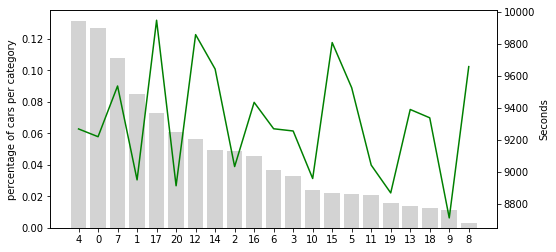

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.xticks(occ_df.index, occ_df['Occupation'], rotation=0)

ax2 = ax.twinx()
ax.bar(occ_df.index, occ_df["Occupation_percent"], color='lightgrey')
ax2.plot(occ_df.index, occ_df["Purchase"], color='green', label='Seconds')
ax.set_ylabel('percentage of cars per category')
ax2.set_ylabel('Seconds')

In [13]:
occ_df = pd.Series(dataset['Occupation'].value_counts() / total_occ)
occ_df.sort_values(ascending=False)
occ_df




occ_df[occ_df>=0.05].index

Int64Index([4, 0, 7, 1, 17, 20, 12], dtype='int64')

In [14]:
grouping_dict={
    k:('rare' if k not in occ_df[occ_df>=0.05].index else k)
    for k in occ_df.index
}

grouping_dict

{4: 4,
 0: 0,
 7: 7,
 1: 1,
 17: 17,
 20: 20,
 12: 12,
 14: 'rare',
 2: 'rare',
 16: 'rare',
 6: 'rare',
 3: 'rare',
 10: 'rare',
 15: 'rare',
 5: 'rare',
 11: 'rare',
 19: 'rare',
 13: 'rare',
 18: 'rare',
 9: 'rare',
 8: 'rare'}

In [15]:
dataset['Occupation_grouped']=dataset['Occupation'].map(grouping_dict)

dataset[['Occupation','Occupation_grouped']].head(30)
                                                 

,Occupation,Occupation_grouped
377701,7,7
441314,14,rare
343557,12,12
344184,2,rare
518804,0,0
443221,10,rare
146057,0,0
61928,16,rare
416541,0,0
154446,7,7


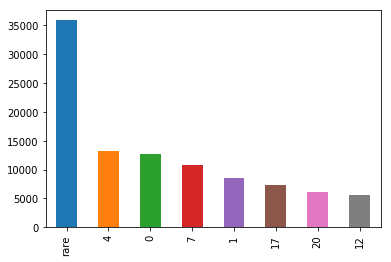

In [16]:
dataset['Occupation_grouped'].value_counts().plot.bar()

In [17]:
dataset['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

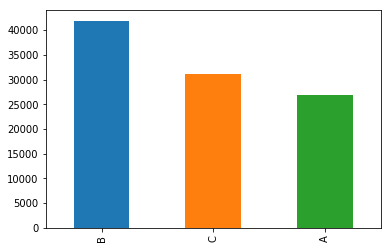

In [18]:
dataset['City_Category'].value_counts().plot.bar()

In [19]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Occupation_grouped
377701,1004089,P00293142,M,26-35,7,A,1,0,5,NaN,NaN,1769,7
441314,1001895,P00112542,M,36-45,14,C,2,0,1,11.0,15.0,15525,rare
343557,1004871,P00322142,M,18-25,12,C,2,0,1,14.0,NaN,19038,12
344184,1004973,P00115642,F,55+,2,C,1,1,8,14.0,NaN,8049,rare
518804,1001880,P00053342,M,36-45,0,B,3,1,1,2.0,4.0,4447,0


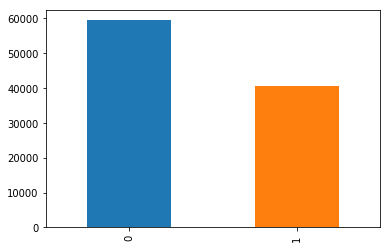

In [20]:
dataset.Marital_Status.value_counts().plot.bar()

In [21]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()




In [22]:
dataset['Gender']=label.fit_transform(dataset['Gender'])
dataset['Age']=label.fit_transform(dataset['Age'])

dataset['Marital_Status']=label.fit_transform(dataset['Marital_Status'])
dataset['City_Category']=label.fit_transform(dataset['City_Category'])


In [23]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Occupation_grouped
377701,1004089,P00293142,1,2,7,0,1,0,5,NaN,NaN,1769,7
441314,1001895,P00112542,1,3,14,2,2,0,1,11.0,15.0,15525,rare
343557,1004871,P00322142,1,1,12,2,2,0,1,14.0,NaN,19038,12
344184,1004973,P00115642,0,6,2,2,1,1,8,14.0,NaN,8049,rare
518804,1001880,P00053342,1,3,0,1,3,1,1,2.0,4.0,4447,0


In [24]:
dataset.Product_Category_1.unique()

array([ 5,  1,  8, 11,  6, 15,  3, 13, 16,  2,  4, 12, 17, 18,  7, 10, 14,
        9], dtype=int64)

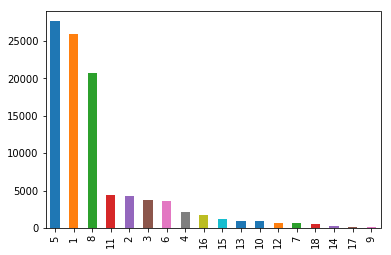

In [25]:
dataset.Product_Category_1.value_counts().plot.bar()

In [26]:
total_pdt=len(dataset)
pdt_df = pd.Series(dataset['Product_Category_1'].value_counts() / total_pdt).reset_index()
pdt_df.columns = ['Product_Category_1', 'Product_Category_1_precentage']
pdt_df

,Product_Category_1,Product_Category_1_precentage
0,5,0.27684
1,1,0.25937
2,8,0.20769
3,11,0.04415
4,2,0.04313
5,3,0.03714
6,6,0.03680
7,4,0.02143
8,16,0.01796
9,15,0.01160


In [27]:
pdt_df = pdt_df.merge(
    dataset.groupby(['Product_Category_1'])['Purchase'].mean().reset_index(), on='Product_Category_1', how='left')

pdt_df

,Product_Category_1,Product_Category_1_precentage,Purchase
0,5,0.27684,6229.454703
1,1,0.25937,13622.746501
2,8,0.20769,7513.219751
3,11,0.04415,4666.116195
4,2,0.04313,11235.126362
5,3,0.03714,10013.037695
6,6,0.03680,15733.890217
7,4,0.02143,2336.372842
8,16,0.01796,14576.573497
9,15,0.01160,14674.393966


Text(0, 0.5, 'Seconds')

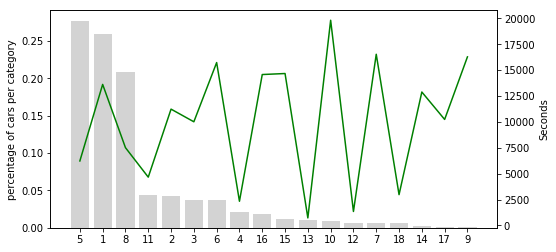

In [28]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.xticks(pdt_df.index, pdt_df['Product_Category_1'], rotation=0)

ax2 = ax.twinx()
ax.bar(pdt_df.index, pdt_df["Product_Category_1_precentage"], color='lightgrey')
ax2.plot(pdt_df.index, pdt_df["Purchase"], color='green', label='Seconds')
ax.set_ylabel('percentage of cars per category')
ax2.set_ylabel('Seconds')

In [29]:
pdt_df = pd.Series(dataset['Product_Category_1'].value_counts() / total_occ)
pdt_df.sort_values(ascending=False)
pdt_df




pdt_df[pdt_df>=0.20].index

Int64Index([5, 1, 8], dtype='int64')

In [30]:
grouping_dict_pdt={
    k:('rare' if k not in pdt_df[pdt_df>=0.20].index else k)
    for k in pdt_df.index
}

grouping_dict_pdt

{5: 5,
 1: 1,
 8: 8,
 11: 'rare',
 2: 'rare',
 3: 'rare',
 6: 'rare',
 4: 'rare',
 16: 'rare',
 15: 'rare',
 13: 'rare',
 10: 'rare',
 12: 'rare',
 7: 'rare',
 18: 'rare',
 14: 'rare',
 17: 'rare',
 9: 'rare'}

In [31]:
dataset['Product_grouped_1']=dataset['Product_Category_1'].map(grouping_dict_pdt)

dataset[['Product_Category_1','Product_grouped_1']].head(30)

,Product_Category_1,Product_grouped_1
377701,5,5
441314,1,1
343557,1,1
344184,8,8
518804,1,1
443221,11,rare
146057,8,8
61928,8,8
416541,6,rare
154446,8,8


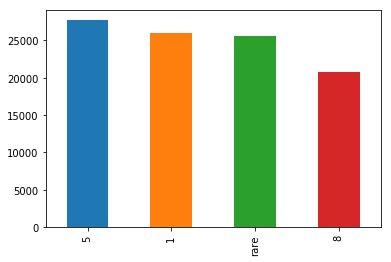

In [32]:
dataset.Product_grouped_1.value_counts().plot.bar()

In [33]:
dataset['Product_grouped_1']=dataset['Product_grouped_1'].astype(str)

In [34]:
dataset['Product_grouped_1']=label.fit_transform(dataset['Product_grouped_1'])

In [35]:
dataset.info()

dataset['Occupation_grouped']=dataset['Occupation_grouped'].astype(str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 377701 to 263607
Data columns (total 14 columns):
User_ID                       100000 non-null int64
Product_ID                    100000 non-null object
Gender                        100000 non-null int32
Age                           100000 non-null int32
Occupation                    100000 non-null int64
City_Category                 100000 non-null int32
Stay_In_Current_City_Years    100000 non-null object
Marital_Status                100000 non-null int64
Product_Category_1            100000 non-null int64
Product_Category_2            68682 non-null float64
Product_Category_3            30473 non-null float64
Purchase                      100000 non-null int64
Occupation_grouped            100000 non-null object
Product_grouped_1             100000 non-null int32
dtypes: float64(2), int32(4), int64(5), object(3)
memory usage: 9.9+ MB


In [36]:
dataset['Occupation_grouped']=label.fit_transform(dataset['Occupation_grouped'])

In [37]:
X=dataset[['Gender','Age','Occupation','City_Category','Marital_Status','Occupation_grouped','Product_grouped_1']]

In [38]:
X.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Occupation_grouped,Product_grouped_1
377701,1,2,7,0,0,6,1
441314,1,3,14,2,0,7,0
343557,1,1,12,2,0,2,0
344184,0,6,2,2,1,7,2
518804,1,3,0,1,1,0,0


In [39]:
y=dataset['Purchase']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=44,test_size=0.3)

In [42]:
X_train.shape

(70000, 7)

In [43]:
X_test.shape

(30000, 7)

In [ ]:
from sklearn.linear_model import LogisticRegression


logit = LogisticRegression(random_state=44)

# train model
logit.fit(X_train, y_train)

# make predicion on test set
pred = logit.predict_proba(X_test)

print('LogReg Accuracy: {}'.format(logit.score(X_test, y_test)))
print('LogReg roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
